<img src = "https://github.com/HarryVargas96/UdeCataluna/blob/main/logo_uc_grande.png?raw=true" alt = "Encabezado" width = "100%">  </img>

# **Taller guiado de limpieza de valores faltantes y datos atípicos**

Este taller guiado tiene como objetivo hacer un acercamiento práctico a la limpieza y preparación de un conjunto de datos.

En este taller guiado veremos como:
* Corregir valores faltantes- eliminación o reemplazo
* Detección de valores atípicos

## **1. Instalar e importar los paquetes necesarios**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Cargar datos**

Cargamos un dataset con 100.974 observaciones obtenido de un muestreo de los resultados del ICFES 2020 segundo periodo. Este es un subconjunto del dataset original donde se han escogido 14 variables de estudio. La variable V1 fue creada durante el procesamiento que permitió la creación del dataset. Cada observación pertenece a los datos de un estudiante, se puede encontrar información socioeconómica del estudiante y su familia. El objetivo de análisis principal de este dataset es identificar el impacto de las condiciones socieconómicoas sobre el desempeño general de la prueba `PUNT_GLOBAL`. El enfoque en este notebook es hacer el trabajo de limpieza del dataset, puede realizar la exploración por su cuenta.

In [32]:
icfes = pd.read_csv('https://raw.githubusercontent.com/HarryVargas96/ICFES/main/icfes_2020_reducido.csv')

In [3]:
icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100974 entries, 0 to 100973
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Unnamed: 0            100974 non-null  int64 
 1   ESTU_GENERO           100972 non-null  object
 2   ESTU_FECHANACIMIENTO  100974 non-null  object
 3   ESTU_TIENEETNIA       100363 non-null  object
 4   ESTU_DEPTO_RESIDE     100974 non-null  object
 5   FAMI_ESTRATOVIVIENDA  97576 non-null   object
 6   FAMI_EDUCACIONPADRE   98373 non-null   object
 7   FAMI_EDUCACIONMADRE   98267 non-null   object
 8   FAMI_TIENEINTERNET    98274 non-null   object
 9   FAMI_TIENECOMPUTADOR  96928 non-null   object
 10  COLE_NATURALEZA       100974 non-null  object
 11  COLE_AREA_UBICACION   100974 non-null  object
 12  COLE_JORNADA          100974 non-null  object
 13  PUNT_GLOBAL           100974 non-null  int64 
 14  ESTU_GENERACION-E     100974 non-null  object
dtypes: int64(2), obje

A su vez también cargamos una serie de tiempo, estos datos provienen de un sensor ambiental ubicado en la ciudad de Londres. Corresponde a las mediciones de la concentración de material particulado PM2.5 es decir, diametro de 2.5 micras o menos durante el año de 2018 con una frecuencia de recolección de 15 minutos. Para más información del dataset consulte [aquí](https://www.londonair.org.uk/london/asp/datadownload.asp).

In [93]:
air = pd.read_csv('https://raw.githubusercontent.com/HarryVargas96/UdeCataluna/main/Londonair.csv')

In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     35040 non-null  object 
 1   Species                  35040 non-null  object 
 2   ReadingDateTime          35040 non-null  object 
 3   Value                    32136 non-null  float64
 4   Units                    35040 non-null  object 
 5   Provisional or Ratified  35040 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


## **3. Dataset ICFES**



### Conversión y transformación de variables

Para facilitar el trabajo vamos a transformar las variables cualitativas que aparecen como character en factores, y vamos a eliminar la variable V1.

In [6]:
icfes.head()

,Unnamed: 0,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E
0,453241,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO
1,387781,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO
2,77011,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD
3,135370,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO
4,31081,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO


In [7]:
# Eliminación de variable, recuerde crear una copia si no está seguro de eliminar la variable de manera permanente
icfes_copy = icfes
icfes.drop(columns='Unnamed: 0',inplace=True)
icfes

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E
0,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO
1,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO
2,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD
3,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO
4,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100969,M,01/10/2002,No,BOGOTÁ,Estrato 2,Educación profesional completa,Educación profesional completa,Si,Si,NO OFICIAL,URBANO,COMPLETA,320,NO
100970,M,28/08/2003,Si,SAN ANDRES,Estrato 3,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,Si,Si,NO OFICIAL,URBANO,MAÑANA,263,GENERACION E - GRATUIDAD
100971,M,21/05/2003,No,BOGOTÁ,Estrato 3,No sabe,Educación profesional completa,Si,Si,NO OFICIAL,URBANO,COMPLETA,244,NO
100972,F,15/03/2002,No,ATLANTICO,Estrato 6,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,Si,Si,NO OFICIAL,URBANO,MAÑANA,215,NO


La variable `ESTU_FECHANACIMIENTO` tal como está no sirve para el análisis, es necesario crear la variable `EDAD`.


Para eso vamos a usar la libreria lubridate y una función nueva. Como queremos saber la edad de los estudiantes al momento de presentar la prueba debemos tener presente que la prueba se realizó el 9 de agosto de 2020.

In [8]:
from datetime import datetime
# Modulo que permite trabajar con fechas
# strptime es un método que permite convertir un string a fecha de acuerdo 
def edad(cadena):
    birth = datetime.strptime(cadena, '%d/%m/%Y') # Fecha nacimiento
    prueba = datetime.strptime('09/08/2020', '%d/%m/%Y') #Fecha presentación examen
    return prueba.year - birth.year # Edad el día de presentación del examen

edad('18/04/2003') # Celda de prueba

17

Para la transformación de los datos se utiliza una método de mapeo conocido como `apply`, lo que haremos será aplicar la función `edad` declarada anteriormente sobre todas las filas del dataset `icfes`.

In [33]:
icfes['ESTU_EDAD']  = icfes['ESTU_FECHANACIMIENTO'].apply( lambda x: edad(x) )

In [10]:
icfes.head()

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,COLE_NATURALEZA,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_GLOBAL,ESTU_GENERACION-E,ESTU_EDAD
0,M,27/04/2002,No,CUNDINAMARCA,Estrato 3,No sabe,No sabe,Si,Si,OFICIAL,URBANO,MAÑANA,267,NO,18
1,M,19/05/2005,Si,VALLE,Estrato 2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Si,Si,OFICIAL,URBANO,MAÑANA,282,NO,15
2,F,07/08/2002,Si,NARIÑO,Estrato 1,Educación profesional completa,Secundaria (Bachillerato) completa,Si,No,OFICIAL,URBANO,MAÑANA,226,GENERACION E - GRATUIDAD,18
3,M,03/10/2001,Si,BOGOTÁ,Estrato 2,Postgrado,Técnica o tecnológica completa,Si,Si,OFICIAL,URBANO,MAÑANA,237,NO,19
4,M,21/08/2002,No,ANTIOQUIA,Estrato 2,Educación profesional incompleta,Primaria incompleta,Si,Si,OFICIAL,URBANO,MAÑANA,229,NO,18


### Detección y corrección de datos atípicos


Hagamos una revisión e inspección visual de la variable `EDAD` usando un boxplot. Es bastante claro la presencia de valores atípicos, con una edad máxima de 2018.

In [34]:
icfes.describe()

,Unnamed: 0,PUNT_GLOBAL,ESTU_EDAD
count,100974.000000,100974.000000,100974.000000
mean,252481.857983,248.445986,17.635966
std,145788.076596,48.741511,9.357959
min,4.000000,0.000000,0.000000
25%,126054.500000,211.000000,17.000000
50%,252170.500000,245.000000,17.000000
75%,379022.750000,282.000000,18.000000
max,504868.000000,500.000000,2018.000000


<Axes: xlabel='ESTU_EDAD'>

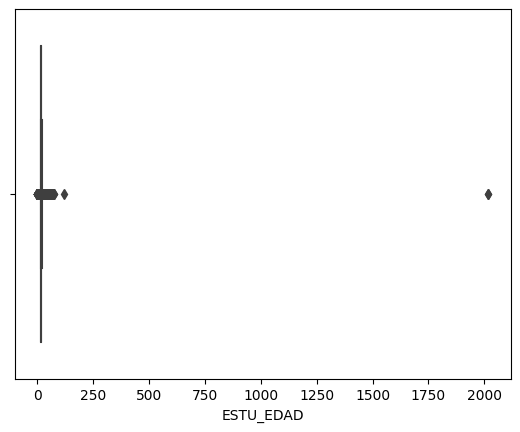

In [12]:
sns.boxplot(data=icfes, x='ESTU_EDAD')

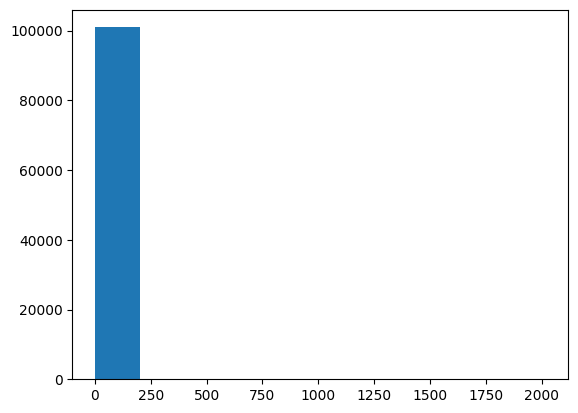

In [13]:
plt.hist( icfes['ESTU_EDAD'])
plt.show();

Veamos los datos atípicos usando un filtro.

In [14]:
icfes.loc[icfes['ESTU_EDAD']> 80,['ESTU_EDAD','ESTU_FECHANACIMIENTO']]

,ESTU_EDAD,ESTU_FECHANACIMIENTO
73036,2018,30/06/0002
80700,2017,07/04/0003
87761,120,01/01/1900


Al visualizar los datos con este filtro se observan 3 observaciones atípicas con edades de 120, 2017 y 2018 años. Al tratarse de errores en la recolección es necesario eliminar estas observaciones.


In [15]:
icfes.loc[icfes['ESTU_EDAD']> 80].index

Int64Index([73036, 80700, 87761], dtype='int64')

In [37]:
icfes2 = icfes.loc[icfes['ESTU_EDAD']<80]

icfes2.describe()

,Unnamed: 0,PUNT_GLOBAL,ESTU_EDAD
count,100971.000000,100971.000000,100971.000000
mean,252482.429569,248.445019,17.595339
std,145788.161874,48.740295,2.871913
min,4.000000,0.000000,0.000000
25%,126057.000000,211.000000,17.000000
50%,252169.000000,245.000000,17.000000
75%,379025.500000,282.000000,18.000000
max,504868.000000,500.000000,74.000000


In [38]:
icfes.drop(icfes.loc[icfes['ESTU_EDAD']> 80].index).shape

(100971, 16)

<Axes: xlabel='ESTU_EDAD'>

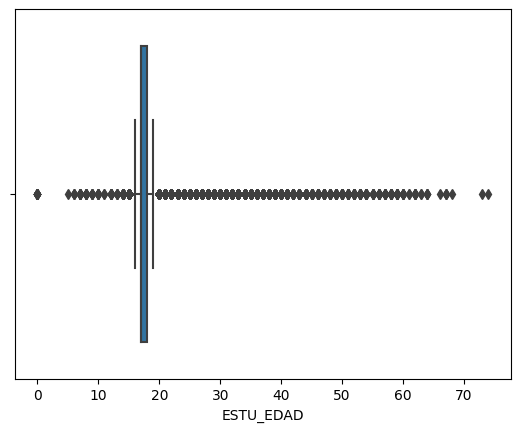

In [39]:
sns.boxplot(data=icfes2, x='ESTU_EDAD')

Se puede observar que existen observaciones con edades desde 0 años, ¿qué tratamiento le daría estas observaciones con edades sospechosamente bajas?

In [19]:
icfes.loc[icfes['ESTU_EDAD'] < 14].shape

(60, 15)

Eliminamos los datos que se encuentren con una edad menor a 14 años, sinembargo observemos primero como se comporta el primer cuartil.

In [25]:
cuantil_1 = icfes["ESTU_EDAD"].quantile(0.25)
print("Cuantil 1= ", cuantil_1)
icfes.loc[icfes["ESTU_EDAD"] < 14].max()

Cuantil 1=  17.0


<ipython-input-25-0d888e59edd7>:3: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  icfes.loc[icfes["ESTU_EDAD"] < 14].max()


ESTU_GENERO                      M
ESTU_FECHANACIMIENTO    30/10/2007
ESTU_DEPTO_RESIDE            VALLE
COLE_NATURALEZA            OFICIAL
COLE_AREA_UBICACION         URBANO
COLE_JORNADA                 UNICA
PUNT_GLOBAL                    356
ESTU_GENERACION-E               NO
ESTU_EDAD                       13
dtype: object

Eliminamos todos los datos que estén por debajo de 14 años.

<Axes: xlabel='ESTU_EDAD'>

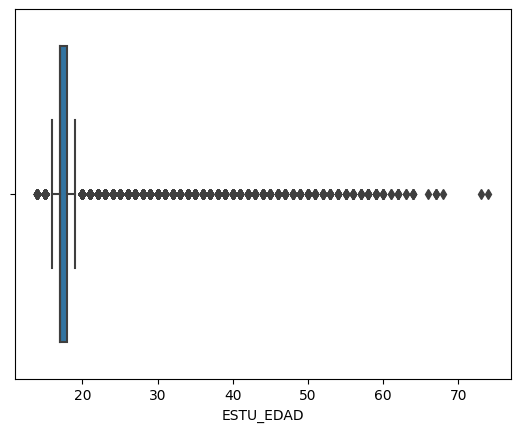

In [44]:
icfes3 = icfes2.drop(icfes2.loc[icfes2["ESTU_EDAD"]< 14].index)
sns.boxplot(data=icfes3, x="ESTU_EDAD")

### Inspección y corrección de valores faltantes

Para corregir los valores faltantes hay varias alternativas, a continuación también se mencionan las funciones de la librería pandas que se emplean en cada caso:

* Eliminar los registros con NAs - `dropna()`
* Reemplazar por un valor constante (la media, la mediana, la moda o un valor personalizado) - `fillna()`
* Reemplazar por el último valor no faltante - `fillna()` esta solución es especialmente útil para series de tiempo, o conjuntos de datos altamente correlacionados.
* Utilizar modelos predictivos para hacer la imputación de valores faltantes.

Ahora debemos hacer un conteo de los valores faltantes por cada variable. Tenga presente que existen varios tipos de valores nulos: None, NaN y NA. NA es la representación más utilizada.

In [46]:
icfes3.shape

(100911, 16)

In [47]:
icfes3.isnull().sum().sort_values(ascending = False)

FAMI_TIENECOMPUTADOR    4041
FAMI_ESTRATOVIVIENDA    3394
FAMI_EDUCACIONMADRE     2702
FAMI_TIENEINTERNET      2696
FAMI_EDUCACIONPADRE     2596
ESTU_TIENEETNIA          608
ESTU_GENERO                2
Unnamed: 0                 0
ESTU_FECHANACIMIENTO       0
ESTU_DEPTO_RESIDE          0
COLE_NATURALEZA            0
COLE_AREA_UBICACION        0
COLE_JORNADA               0
PUNT_GLOBAL                0
ESTU_GENERACION-E          0
ESTU_EDAD                  0
dtype: int64

In [48]:
icfes3.isnull().sum()*100/icfes3.shape[0]

Unnamed: 0              0.000000
ESTU_GENERO             0.001982
ESTU_FECHANACIMIENTO    0.000000
ESTU_TIENEETNIA         0.602511
ESTU_DEPTO_RESIDE       0.000000
FAMI_ESTRATOVIVIENDA    3.363360
FAMI_EDUCACIONPADRE     2.572564
FAMI_EDUCACIONMADRE     2.677607
FAMI_TIENEINTERNET      2.671661
FAMI_TIENECOMPUTADOR    4.004519
COLE_NATURALEZA         0.000000
COLE_AREA_UBICACION     0.000000
COLE_JORNADA            0.000000
PUNT_GLOBAL             0.000000
ESTU_GENERACION-E       0.000000
ESTU_EDAD               0.000000
dtype: float64

La forma más sencilla para lidiar con los NAs es eliminándolos del dataset. En este caso pasamos de 100.971 observaciones a 94.912. Tan solo perdimos el 6% de los datos. Algunos modelos como el de regresión lineal `lm()` permiten lidiar con los NAs de varias formas, sin embargo en la gran mayoría de algoritmos hay que lidiar con esta situación antes del modelamiento.

In [51]:
# Con la opción inplace = True puede modificar el dataset original

icfes_nona = icfes3.dropna()

print(icfes_nona.isnull().sum())
print("**********"*3)
print(icfes3.shape)
print(icfes_nona.shape)

Unnamed: 0              0
ESTU_GENERO             0
ESTU_FECHANACIMIENTO    0
ESTU_TIENEETNIA         0
ESTU_DEPTO_RESIDE       0
FAMI_ESTRATOVIVIENDA    0
FAMI_EDUCACIONPADRE     0
FAMI_EDUCACIONMADRE     0
FAMI_TIENEINTERNET      0
FAMI_TIENECOMPUTADOR    0
COLE_NATURALEZA         0
COLE_AREA_UBICACION     0
COLE_JORNADA            0
PUNT_GLOBAL             0
ESTU_GENERACION-E       0
ESTU_EDAD               0
dtype: int64
******************************
(100911, 16)
(94860, 16)


Es conveniente contar cuantos NAs existen en una observación determinada, por ejemplo hay 3269 observaciones con 1 solo valor faltante, observaciones con múltiples valores faltantes son dificilmente rescatables ya que hay demasiada información que recuperar. Estos casos pueden ser imputados utilizando modelos predictivos

In [52]:
icfes3.isnull().sum(axis = 1)

0         0
1         0
2         0
3         0
4         0
         ..
100969    0
100970    0
100971    0
100972    0
100973    0
Length: 100911, dtype: int64

In [53]:
icfes3.isnull().sum(axis = 1).value_counts()

0    94860
1     3266
5     2301
2      330
3       68
4       56
6       30
dtype: int64

In [54]:
# Filtro para encontrar observaciones con 5 valores faltantes

icfes3[icfes3.isnull().sum(axis = 1) == 5].index

Int64Index([    16,     34,     74,     95,    131,    216,    258,    381,
               386,    483,
            ...
            100644, 100714, 100751, 100752, 100809, 100829, 100832, 100892,
            100915, 100939],
           dtype='int64', length=2301)

En algunos casos se puede reemplazar los NAs por la mediana o media en el caso de variables cuantitativas, o por la moda en el caso de variables cualitativas, a continuacón vamos a reemplazar los valores faltantes de la variable `ESTU_TIENEETNIA` por la moda que es "No".

In [55]:
icfes3['ESTU_TIENEETNIA'].value_counts(normalize = True)

No    0.936502
Si    0.063498
Name: ESTU_TIENEETNIA, dtype: float64

In [56]:
icfes3['ESTU_TIENEETNIA'] = icfes3['ESTU_TIENEETNIA'].fillna(value = 'No')

# Se cuentan la cantidad de valores nulos en la variable ESTU_TIENEETINA

icfes3['ESTU_TIENEETNIA'].isnull().sum()

0

In [58]:
icfes3.isnull().sum()

Unnamed: 0                 0
ESTU_GENERO                2
ESTU_FECHANACIMIENTO       0
ESTU_TIENEETNIA            0
ESTU_DEPTO_RESIDE          0
FAMI_ESTRATOVIVIENDA    3394
FAMI_EDUCACIONPADRE     2596
FAMI_EDUCACIONMADRE     2702
FAMI_TIENEINTERNET      2696
FAMI_TIENECOMPUTADOR    4041
COLE_NATURALEZA            0
COLE_AREA_UBICACION        0
COLE_JORNADA               0
PUNT_GLOBAL                0
ESTU_GENERACION-E          0
ESTU_EDAD                  0
dtype: int64

Efectuamos el remplazo por la media en todos los valores nulos para las variables FAMI_ESTRATOVIVIENTA, FAMI_EDUCACIONPADRE, FAMI_EDUCACIONMADRE, FAMI_TIENEINTERNET, FAMI_TIENECOMPUTADOR.

In [83]:
def Nan_Replace_by_median(dataframe, print_percentage=False, replace_by_median=True):
  col_with_nuls = dataframe.columns[dataframe.isnull().any()]
  col_with_nuls = col_with_nuls.tolist()

  for col in col_with_nuls:
    col_per = dataframe[col].value_counts(normalize = True)
    col_tuples = list(zip(col_per.index, col_per.values))
    max_tuple = max(col_tuples, key= lambda x:x[1])
  
  if print_percentage == True:
    for i in col_tuples:
      print(col_tuples[i])
  
  if replace_by_median == True:
    for col in col_with_nuls:
      dataframe[col] = dataframe[col].fillna(value = max_tuple[0])
  
  return dataframe

In [86]:
icfes_4 = Nan_Replace_by_median(icfes3, print_percentage=False, replace_by_median=True)
print(icfes_4.isnull().sum())
print("**********"*3)
print(icfes3.shape)
print(icfes_4.shape)

Unnamed: 0              0
ESTU_GENERO             0
ESTU_FECHANACIMIENTO    0
ESTU_TIENEETNIA         0
ESTU_DEPTO_RESIDE       0
FAMI_ESTRATOVIVIENDA    0
FAMI_EDUCACIONPADRE     0
FAMI_EDUCACIONMADRE     0
FAMI_TIENEINTERNET      0
FAMI_TIENECOMPUTADOR    0
COLE_NATURALEZA         0
COLE_AREA_UBICACION     0
COLE_JORNADA            0
PUNT_GLOBAL             0
ESTU_GENERACION-E       0
ESTU_EDAD               0
dtype: int64
******************************
(100911, 16)
(100911, 16)


## **4. Dataset air london**

In [87]:
air.describe()

,Value
count,32136.000000
mean,15.596621
std,10.442254
min,-3.000000
25%,9.000000
50%,13.000000
75%,18.000000
max,194.000000


En el resumen se puede observar que todas las mediciones fueron realizadas en el mismo sitio, solo hay una especie medida que es PM2.5, la unidad es la misma en todos los casos y las mediciones ratificadas. Las únicas variables útiles son `ReadingDateTime` y `Value`. En el caso de `Value` se observa que tiene 2904 NAs, a continuación se muestra como hacer el reemplazo por la mediana usando `replace_na` y `fill`. Al tratarse de una serie de tiempo, la opción de llenado con `fill` es la más indicada.

In [105]:
air["Value"].index[air["Value"].isnull()]

Int64Index([ 1976,  1977,  1978,  1979,  4356,  4357,  4358,  4359,  6284,
             6285,
            ...
            34038, 34039, 34608, 34609, 34610, 34611, 34612, 34613, 34614,
            34615],
           dtype='int64', length=2904)

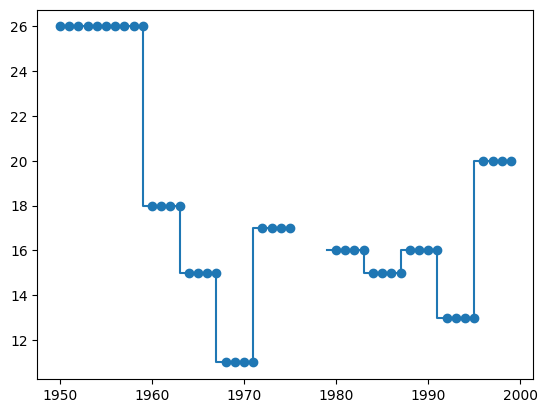

In [112]:
series = air["Value"][1950:2000]

# Create a plot with jumps for null values
fig, ax = plt.subplots()
series.plot(ax=ax, drawstyle='steps-pre', marker='o', markersize=6)

# Show the plot
plt.show()

### Reemplazo con la mediana

In [88]:
air.isnull().sum()

Site                          0
Species                       0
ReadingDateTime               0
Value                      2904
Units                         0
Provisional or Ratified       0
dtype: int64

In [89]:
air.isnull().sum()*100/air.shape[0]

Site                       0.000000
Species                    0.000000
ReadingDateTime            0.000000
Value                      8.287671
Units                      0.000000
Provisional or Ratified    0.000000
dtype: float64

In [90]:
# Se crea una copia del dataset
air_median = air

air_median['Value'].median()

13.0

In [91]:
# Este método solo se aplicará sobre variables numéricas
air_median = air.fillna(13)

air_median.isnull().sum()

Site                       0
Species                    0
ReadingDateTime            0
Value                      0
Units                      0
Provisional or Ratified    0
dtype: int64

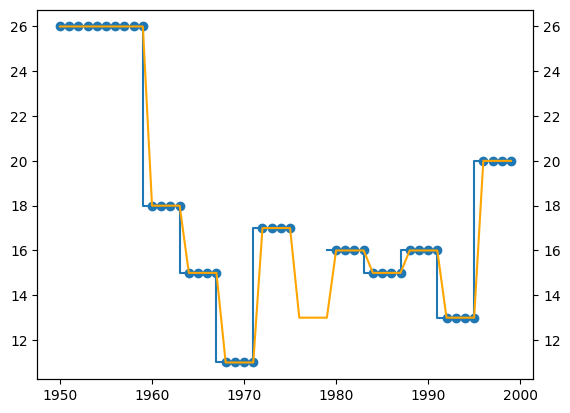

In [115]:
time_series = air["Value"]
filled_series = time_series.fillna(time_series.median())

# Graficamos solo la porcion que queremos evidenciar como discontínua
series = air["Value"][1950:2000]
fill_series = filled_series[1950:2000]

# Creamos un plot que muestre los saltos discontínuos de la serie temporal
fig, ax = plt.subplots()
ax.plot(series.index, series, drawstyle='steps-pre',
        marker='o', markersize=6)

ax2 = ax.twinx()
ax2.plot(fill_series.index, fill_series, color='orange')

# Show the plot
plt.show()

### Reemplazo con `fillna`

Se pueden reemplazar los valores faltantes con las entradas previas o siguientes. Para más información de la función `fillna` consulte [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

In [92]:
# con inplace=True se cambiar permanentemente el dataset
# el método ffill -forward fill- propaga la última observación válida para hacer el reemplazo
air.fillna(method='ffill', inplace=True)

air.isnull().sum()

Site                       0
Species                    0
ReadingDateTime            0
Value                      0
Units                      0
Provisional or Ratified    0
dtype: int64

In [ ]:
air.ReadingDateTime = pd.to_datetime(air.ReadingDateTime,
                                     infer_datetime_format = True)

In [ ]:
air.ReadingDateTime.dt.month

0         1
1         1
2         1
3         1
4         1
         ..
35035    12
35036    12
35037    12
35038    12
35039    12
Name: ReadingDateTime, Length: 35040, dtype: int64

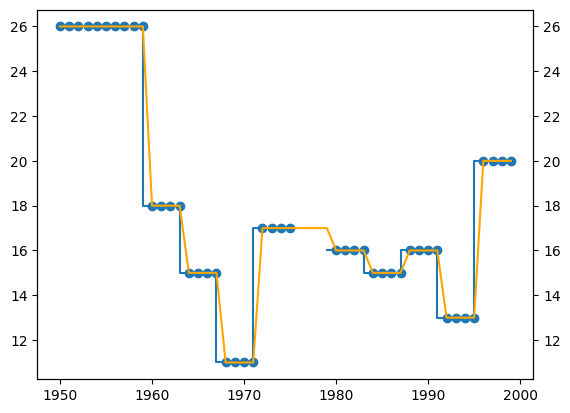

In [116]:
time_series = air["Value"]
filled_series = time_series.fillna(method='ffill')

# Graficamos solo la porcion que queremos evidenciar como discontínua
series = air["Value"][1950:2000]
fill_series = filled_series[1950:2000]

# Creamos un plot que muestre los saltos discontínuos de la serie temporal
fig, ax = plt.subplots()
ax.plot(series.index, series, drawstyle='steps-pre',
        marker='o', markersize=6)

ax2 = ax.twinx()
ax2.plot(fill_series.index, fill_series, color='orange')

# Show the plot
plt.show()

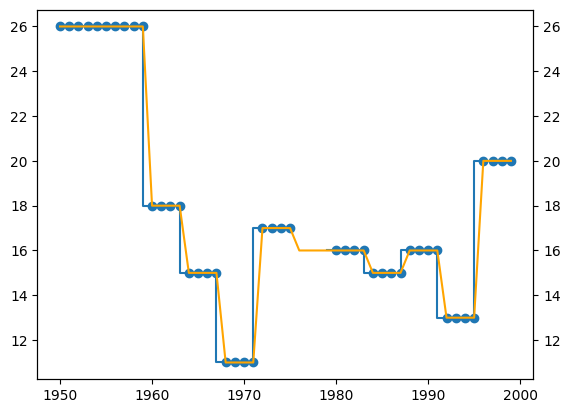

In [117]:
time_series = air["Value"]
filled_series = time_series.fillna(method='bfill')

# Graficamos solo la porcion que queremos evidenciar como discontínua
series = air["Value"][1950:2000]
fill_series = filled_series[1950:2000]

# Creamos un plot que muestre los saltos discontínuos de la serie temporal
fig, ax = plt.subplots()
ax.plot(series.index, series, drawstyle='steps-pre',
        marker='o', markersize=6)

ax2 = ax.twinx()
ax2.plot(fill_series.index, fill_series, color='orange')

# Show the plot
plt.show()

**Créditos**
---

**Profesor:** Harry Vargas Rodríguez

**Corporación Universitaria de Cataluña** - *Diplomado en Big Data y Data Science*